# Code for downloading rainfall data from NOAA radar

##### Note: Install the rasterio module using the command line, "conda install rasterio"

In [501]:
# Import modules

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features as ft

In [4]:
# Obtain the current working directory

glob.os.getcwd()


'C:\\Users\\parkernath32\\Dropbox\\Nathaniel Parker\\KSU_Coursework\\Spring 2020\\Introduction to Scientific Programming\\semester_project'

In [15]:
# User inputs

SOI = input('Enter station name')
lat_SOI = float(input('Enter latitude'))
lon_SOI = float(input('Enter longitude'))
interval = input('Enter data interval')
start =input('Enter start date in mm-dd-yyyy')
end =input('Enter end date in mm-dd-yyyy')
#email = input('Enter recipient email address')

Enter station name 
Enter latitude 38.774
Enter longitude -98.662
Enter data interval 
Enter start date in mm-dd-yyyy 
Enter end date in mm-dd-yyyy 


In [16]:
# Load the .csv file containing radar locations in Kansas

radar = pd.read_csv('radars.csv')

radar.head(13)
#radar.tail()

,Radar_station,State,Latitude,Longitude,Elevation,NEXRAD_ID,Start_date
0,Amarillo,TX,35.23333,-101.70889,1093.3,KAMA,8/4/1994
1,Denver Front Range Airport,CO,39.78667,-104.54528,1675.5,KFTG,5/9/1995
2,Des Moines,IA,41.73111,-93.72278,299.0,KDMX,5/9/1995
3,Dodge City,KS,37.76083,-99.96833,789.4,KDDC,1/1/1995
4,Fort Smith,AR,35.29056,-94.36167,NaN,KSRX,2/10/1997
5,Goodland,KS,39.36694,-101.70000,1112.8,KGLD,5/9/1995
6,Hastings,NE,40.32083,-98.44167,602.3,KUEX,4/11/1995
7,Kansas City,MO,38.81028,-94.26417,303.3,KEAX,5/9/1995
8,North Platte,NE,41.95778,-100.57583,905.3,KLNX,5/3/1996
9,Oklahoma City,OK,35.33306,-97.27750,369.7,KTLX,5/9/1995


In [17]:
# Creating a Haversine function for computing the distance between two points on the earth's surface

def haversine (lat1,lon1,lat2,lon2):
    " A Function for calculating the distance between two points on the earth's surface using the Haversine formula"
    
    import math
    
    R = 6371000  # radius of the earth in meters
    a = math.sin(math.radians((lat1-lat2)/2))**2 + math.cos(math.radians(lat1))*math.cos(math.radians(lat2))*math.sin(math.radians((lon1-lon2)/2))**2
    b = 2* math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = round(R*b/1000,3) # converting the distance from m to km
    return d
    


In [18]:
# Calculating the distances between the station of interest (SOI) and selecting the nearest distance

# Calculating the distance between the stations

distances = []
for i in range(len(radar)):
    distances.append(haversine(lat_SOI,lon_SOI,radar.Latitude[i],radar.Longitude[i]))



In [19]:
# Select the nearest radar station to SOI and its geographic coordinates

for i in range(len(distances)):
    if distances[i] == min(distances):
        idx_nearest = i
        nearest_distance = distances[i]
        nearest_name = radar.Radar_station[i]
        nearest_coordinates = [radar.Latitude[i], radar.Longitude[i]]
        

print('idx:',idx_nearest)
print('nearest distance:', nearest_distance,'km')
print('nearest radar:', nearest_name)
print('nearest station coordinates:',nearest_coordinates)


idx: 3
nearest distance: 160.304 km
nearest radar: Dodge City
nearest station coordinates: [37.76083, -99.96833000000001]


In [563]:
# Loading the Annual data of daily rainfallin 2019 for Contiguous US

data = rasterio.open('nws_precip_wytd_20191001_conus.tif')
#data = rasterio.open('nws_precip_ytd_20200101_conus.tif')

#data = rasterio.open('nws_precip_wytd_20191001_pr.tif')

#data = rasterio.open('nws_precip_1hour_conus.tif')


In [564]:
# Obtain basic indormation about the data

print(data.width) #columns
print(data.height) #rows 
print(data.shape)
print(data.bounds) 
print(data.crs)

# data.profile


1121
881
(881, 1121)
BoundingBox(left=-1904912.11073866, bottom=-7619986.69569394, right=3434410.88926134, top=-3423783.69569394)
PROJCS["NOAA_HRAP_Grid",GEOGCS["GCS_NOAA_HRAP",DATUM["D_NOAA_HRAP",SPHEROID["Sphere",6371200,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",60],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]


In [565]:
# Checking the coordinates of a pixel (first pixel). x is the row, and y is the column. 
#ul, ur,ll, and lr, refers to position whether upper left (ul), upper right (ur) etc. Center is the default

data.xy(0,0, offset ='ul') 


(-1904912.11073866, -3423783.69569394)

In [566]:
# Find and create a mask for the missing data values 

nodata_value = data.nodata # find the missing data 

data_masked = np.ma.masked_equal(data.read(),nodata_value) # mask the missing data 

# data_masked[1,609,800] #[1,600,800]


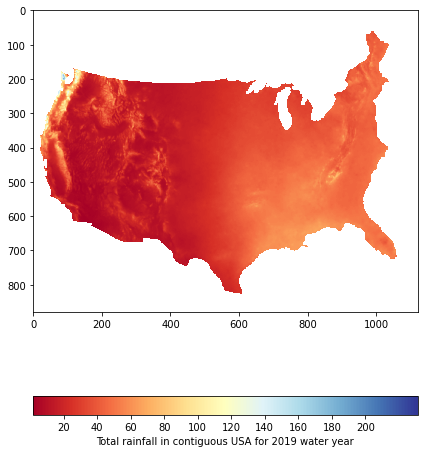

In [573]:
# Plot a map of the observed data without missing values

plt.figure(figsize= (6,8))
plt.imshow(data_masked[1,:,:], cmap = 'RdYlBu') #Band 1 contains the observed data
cb = plt.colorbar(ticks = range(0,201,20), label = 'Total rainfall in contiguous USA for 2019 water year', orientation = 'horizontal')
plt.tight_layout()
#plt.savefig('ConUS_wyr')
plt.show()
